### QUESTIONABLE!!

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import scipy.ndimage

#### We already know that $1''$ on solar surface coresponds to approximately $720\,km$.

#### Size of one pixel in the original simulation is $16\,km$. From here we have: 

#### $\frac{pixel}{''}=\frac{720\,km}{16\,km/p}=45\,\text{pixel}$. Furthermore:

#### ($\theta=0.32''$) $D=0.5\,m\rightarrow{}\text{binning factor}=14.4$

#### ($\theta=0.16''$) $D=1.0\,m\rightarrow{}\text{binning factor}=7.2$

#### ($\theta=0.08''$) $D=2.0\,m\rightarrow{}\text{binning factor}=3.6$

#### ($\theta=0.032''$) $D=5.0\,m\rightarrow{}\text{binning factor}=1.8$

#### Those are the factor we need to bin our FOV (1536, 648) with, to match desired PSF.

In [4]:
stokes = fits.open('qs_ph_pole_synth0.fits')[0].data

bin_factors = [7.2, 3.6]

for factor in bin_factors:
    zoom_factors = (1.0/factor, 1.0/factor, 1, 1)
    data_b = scipy.ndimage.zoom(stokes, zoom=zoom_factors, order=1)
    output_filename = f'qs_ph_pole_synth_bin_{factor}.fits'
    fits.writeto(output_filename, data_b, overwrite=True)
    print(f"Saved binned file with binning factor {factor} to {output_filename}")

Saved binned file with binning factor 7.2 to qs_ph_pole_synth_bin_7.2.fits
Saved binned file with binning factor 3.6 to qs_ph_pole_synth_bin_3.6.fits


In [6]:
stokes_2 = fits.open('qs_ph_pole_synth_bin_3.6.fits')[0].data
stokes_1 = fits.open('qs_ph_pole_synth_bin_7.2.fits')[0].data
#stokes_05 = fits.open('qs_ph_pole_synth_bin_14.4.fits')[0].data
#stokes_02 = fits.open('qs_ph_pole_synth_bin_36.fits')[0].data

print(stokes_2.shape, stokes_1.shape)

(427, 180, 4, 201) (213, 90, 4, 201)


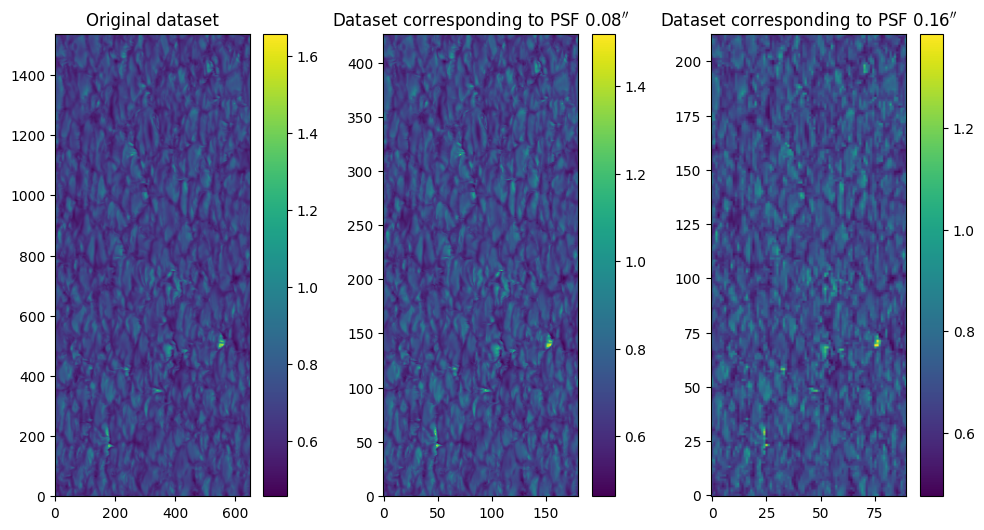

In [19]:
plt.figure(figsize=(12,6))

plt.subplot(131)
plt.imshow(stokes[:,:,0,0], origin='lower')
plt.title(r'Original dataset')
plt.colorbar()

plt.subplot(132)
plt.imshow(stokes_2[:,:,0,0], origin='lower')
plt.title(r'Dataset corresponding to PSF $0.08^{\prime\prime}$')
plt.colorbar()

plt.subplot(133)
plt.imshow(stokes_1[:,:,0,0], origin='lower')
plt.title(r'Dataset corresponding to PSF $0.16^{\prime\prime}$')
plt.colorbar()

plt.show()

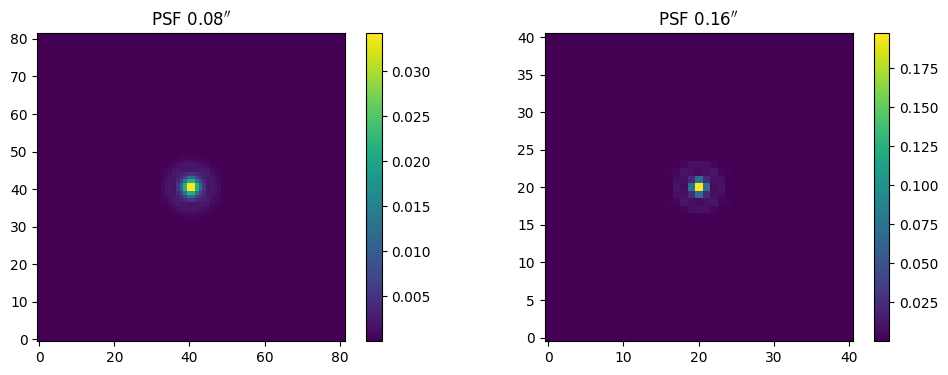

In [33]:
psf_08 = fits.open('hinode_psf_0.08.fits')[0].data # D = 2m
psf_16 = fits.open('hinode_psf_0.16.fits')[0].data # D = 1m
# psf_32 = fits.open('hinode_psf_0.32.fits')[0].data # D = 0.5m

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.imshow(psf_08, origin='lower')
plt.title(r'PSF $0.08^{\prime\prime}$')
plt.colorbar()

plt.subplot(122)
plt.imshow(psf_16, origin='lower')
plt.title('PSF $0.16^{\prime\prime}$')
plt.colorbar()

plt.show()